# 이미지 기본 연산

이미지는 numpy배열이므로 정수와 +, -, /, * 등의 연산이 가능  
  
<이미지 그레이스케일로 읽기>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import cv2
img = cv2.imread('a.jpg', 1)  # 0이 그레이스케일, 1이 컬러

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

<이미지 밝기 조절>  
픽셀값이 클수록 밝고, 0에 가까울수록 어둡다

In [5]:
img2 = img+20  #이미지 밝게 처리
img3 = img-20  #이미지 어둡게 처리
cv2.imshow('img', img)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

<포화연산>  
  
색상 값은 0-255사이의 값을 갖지만 +, - 연산을 수행하면 이 범위를 벗어나는 값을 만들기도 한다. 그런데 이미지 값의 타입은 uint8이므로 256을 0이 되므로 흰색이 검정색으로 변경된다. 이렇게 처리되면 아주 밝은 부분이 아주 어둡게, 또는 아주 어두운 부분이 아주 밝게 반대로 표현되어 이미지가 변질된다. 이를 위해서 포화연산을 처리해주어야 함  
  
포화연산 : 픽셀값이 255를 넘으면 255로, 0 미만이면 0으로 처리하는 연산    
  
함수: np.clip(src, 최소값, 최대값)  
=> 배열 src 요소중 최소값보다 작은 것은 모두 최소값으로, 최대값보다 큰 값은 모두 최대값으로 대체해줌

In [6]:
import numpy as np

arr = np.array([23,34,78,12,98])
arr2 = np.clip(arr, 30, 80)
arr2

array([30, 34, 78, 30, 80])

img2 = img+100  
img3 = np.clip(img2, 0, 255)

이렇게 코드를 작성하면 이미 img2는 uint8로 처리가되어 있기 때문에 np.clip을 해도 소용이 없다 

In [7]:
import numpy as np

def saturate_bright(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic+num, 0, 255)
    pic = pic.astype('uint8')
    return pic

def saturate_dark(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic-num, 0, 255)
    pic = pic.astype('uint8')
    return pic

In [8]:
img2 = saturate_bright(img, 100)  #이미지 밝게 처리
img3 = saturate_dark(img, 100)  #이미지 어둡게 처리
cv2.imshow('img', img)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

과제 - 이미지 밝기를 트랙바로 조절하는 앱

In [1]:
import cv2
import numpy as np

def br(pos):
    pic = saturate_bright(img, pos)
    cv2.imshow('img', pic)
    
def da(pos):
    pic = saturate_dark(img, pos)
    cv2.imshow('img', pic)
    
img = cv2.imread('a.jpg', 1)
cv2.imshow('img', img)
cv2.createTrackbar('bright', 'img', 0, 100, br)
cv2.createTrackbar('dark', 'img', 0, 100, da)
cv2.waitKey(0)
cv2.destroyAllWindows()

<이미지 명암비(대비) 조절>  
명암비란 이미지의 밝은 부분과 어두운 부분의 밝기 차를 의미.  
명암비 조절은 이미지의 밝은 부분은 더 밝게, 이미지의 어두운 부분은 더 어둡게 함으로써 이미지 윤곽을 뚜렷하게 처리하므로 활용도 높음

In [9]:
def saturate_contrast1(p, num):
    pic = p.copy()
    pic = pic.astype('int64')
    pic = np.clip(pic*num, 0, 255)
    pic = pic.astype('uint8')
    return pic

In [10]:
#명암비를 1보다 작게 주면 밝기 차가 줄어들고 전반적으로 어두어짐
img4 = saturate_contrast1(img,0.5)

#명암비를 1보다 크게 주면 밝기 차가 커지고 흰색 영역이 넓어짐
img5 = saturate_contrast1(img, 2)  

cv2.imshow('img', img)
cv2.imshow('img4', img4)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

*명암비 효율적 조절 - 픽셀 중간값인 128을 기준으로 이 보다 큰 값은 더 밝게 만들고 128보다 작은 값은 더 어둡게 만듦으로써 대비를 크게 함  
  
dst(x, y) = src(x, y) + (src(x, y)-128)*alpha

In [21]:
def saturate_contrast2(p, num):
    pic = p.copy()
    pic = pic.astype('int32')
    pic = np.clip(pic+(pic-128)*num, 0, 255)
    pic = pic.astype('uint8')
    return pic

In [5]:
img4 = saturate_contrast2(img,-0.5)
img5 = saturate_contrast2(img, 2)  

cv2.imshow('img', img)
cv2.imshow('img4', img4)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

<히스토그램 분석>  
영상 픽셀 밝기 분포를 분석하여 밝기, 명암비 조절  
  
* cv2.calcHist(img,channel,mask,histSize,range)  
img: 이미지 배열  
channel: 분석할 칼라  
mask: 분석할 영역. None이면 이미지 전체  
histSize: 히스토그램 크기. x축 값 개수  
range: x축 값 범위

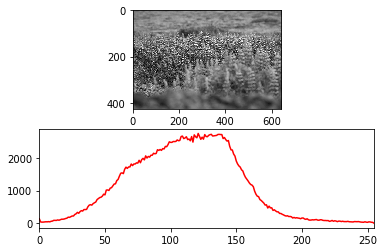

In [17]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('a.jpg', 0)
hist = cv2.calcHist([img],[0],None,[256],[0,255])
plt.subplot(2,1,1),plt.imshow(img,'gray')
plt.subplot(2,1,2),plt.plot(hist,color='r')
plt.xlim([0,255])
plt.show()

이미지를 밝게 조절한 뒤 히스토그램하면 픽셀 분포가 오른쪽으로 이동

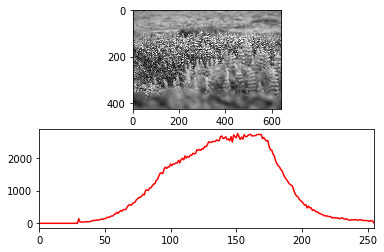

In [23]:
img2 = saturate_bright(img, 30)
hist = cv2.calcHist([img2],[0],None,[256],[0,255])
plt.subplot(2,1,1),plt.imshow(img2,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,255])
plt.show()

이미지를 어둡게 처리한 뒤 히스토그램하면 픽셀 분포가 왼쪽으로 이동

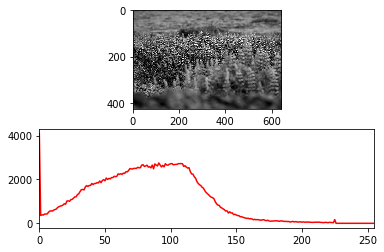

In [27]:
img3 = saturate_dark(img, 30)
hist = cv2.calcHist([img3],[0],None,[256],[0,255])
plt.subplot(2,1,1),plt.imshow(img3,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,255])
plt.show()

명암비를 크게 주고 히스토그램하면 분포가 아주 밝고 아주 어두운 쪽으로 이동

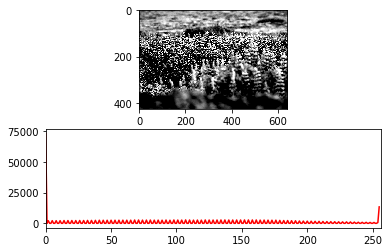

In [28]:
img4 = saturate_contrast2(img, 2)
hist = cv2.calcHist([img4],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img4,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

명암비를 작게 주고 히스토그램하면 분포 영역이 더 작아짐. 이는 이미지가 비슷한 색상에 몰려있고 이는 선명하지 않음을 의미

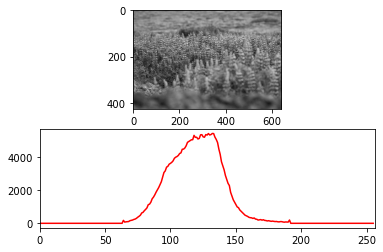

In [15]:
img5 = saturate_contrast2(img, -0.5)
hist = cv2.calcHist([img5],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img5,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

위 그림처럼 흐릿한 이미지를 선명하게 하는 방법으로 히스토그램 스트레칭이 사용될 수 있다. 히스토그램 스트레칭은 분포를 양옆으로 펼쳐준다  
  
dst(x, y) = (src(x, y) - 최소픽셀값)*255/(최대 픽셀값 - 최소 픽셀값)

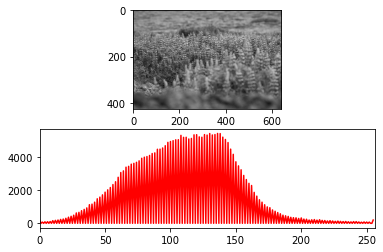

In [18]:
f_max = img5.max()
f_min = img5.min()
nframe = img5.astype('int64')
img6 = np.clip((nframe - f_min)*255/(f_max - f_min), 0, 255).astype('uint8')
hist = cv2.calcHist([img6],[0],None,[256],[0,256])
plt.subplot(2,1,1),plt.imshow(img6,'gray')
plt.subplot(2, 1, 2),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()


히스토그램 스트레칭은 분포도를 넓혀주지만 픽셀값의 평준화는 해주지 않는다 히스토그램 평활화는 그래프에서 너무 돌출되는 부분을 깍아주어 평준화해준다  
  
dst(x, y) = round((누적합(src(x, y))*픽셀최대값)/픽셀누적최대값-최소값) 

In [59]:
#이 문제를 먼저 풀고 가시오
#배열 인덱싱
a=np.array([1,2,3,4,5])
b=np.array([[0,3],[1,4]])
a[b]

array([[1, 4],
       [2, 5]])

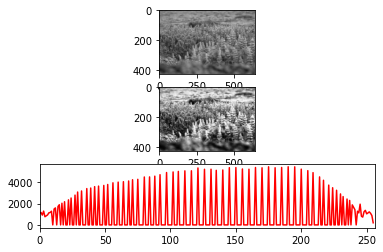

In [19]:
hist, bins = np.histogram(img5.flatten(), 256,[0,256])

cdf = hist.cumsum()  #누적합. 각 빈의 누적합 계산
cdf_m = np.ma.masked_equal(cdf,0) #속도개선을 위해 0인 부분 제외

#히스토그램 평활화
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img7 = cdf[img5]#img5의 값이 cdf배열의 인덱스로 사용됨
                #cdf는 히스토그램 평활화된 값이 저장되어 있으므로
                #img5[12][10]칸의 픽셀값이 125이면 cdf[125]의 값을 추출
                #이 값은 픽셀값 125가 평활화된 값이다
            
hist = cv2.calcHist([img7],[0],None,[256],[0,256])
plt.subplot(3,1,1),plt.imshow(img5,'gray')
plt.subplot(3,1,2),plt.imshow(img7,'gray')
plt.subplot(3,1,3),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()


히스토그램 평활화 함수는  
  
cv2.equalizeHist()  
  
이므로 위 코드를 이 함수 하나로 끝냄

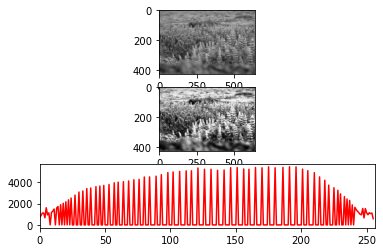

In [20]:
img8 = cv2.equalizeHist(img5)
hist = cv2.calcHist([img8],[0],None,[256],[0,256])
plt.subplot(3,1,1),plt.imshow(img5,'gray')
plt.subplot(3,1,2),plt.imshow(img8,'gray')
plt.subplot(3,1,3),plt.plot(hist,color='r')
plt.xlim([0,256])
plt.show()

이미지에 and, or, not, xor 연산 수행  
이미지 연산은 각 픽셀의 b, g, r bit별 수행

In [5]:
import cv2

img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')

img3 = cv2.bitwise_and(img1, img2)
img4 = cv2.bitwise_or(img1, img2)
img5 = cv2.bitwise_not(img2)
img6 = cv2.bitwise_xor(img1, img2)

imgh1 = cv2.hconcat([img1, img2, img3])
imgh2 = cv2.hconcat([img4, img5, img6])

res = cv2.vconcat([imgh1, imgh2])

cv2.imshow('img', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

<이미지 합성>  
두 이미지의 픽셀값을 더하여 구함.

In [7]:
img1 = cv2.imread('a.jpg', 1)
img1 = cv2.resize(img1, dsize=(640, 410), interpolation=cv2.INTER_AREA)
img2 = cv2.imread('b.jpg', 1)
img3 = img1 + img2
cv2.imshow('img', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

하지만 그냥 더하면 포화문제 발생하므로 포화연산 추가

In [8]:
def saturate_add(p1, p2):
    pic1 = p1.copy()
    pic2 = p2.copy()
    
    pic1 = pic1.astype('int64')
    pic2 = pic2.astype('int64')
    
    pic = np.clip(pic1+pic2, 0, 255)

    pic = pic.astype('uint8')
    return pic

In [9]:
img3 = saturate_add(img1, img2)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

<이미지 합성 함수>  
cv2.add(img1, img2)

In [10]:
img5 = cv2.add(img1, img2)
cv2.imshow('img3', img3)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

<가중치 합성 함수>  
이미지 합성시 원본 이미지에 가중치를 주어 덧셈. 가중치의 합은 1이어야 하고 가중치가 큰 쪽 이미지가 강하게 나옴  
  
dst(x, y) = alpha * src1(x, y) + beta * src2(x, y)


In [11]:
def saturate_addWeight(p1, a1, p2, a2):
    pic1 = p1.copy()
    pic2 = p2.copy()
    
    pic1 = pic1.astype('int64')
    pic2 = pic2.astype('int64')
    
    pic = np.clip(a1*pic1 + a2*pic2, 0, 255)
    
    pic = pic.astype('uint8')
    return pic

In [ ]:
img3 = saturate_addWeight(img1, 0.4, img2, 0.6)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

가중치 합성 함수  
cv2.addWeighted(img1, 비율1, img2, 비율2, 결과물에 더할값)

In [13]:
img5 = cv2.addWeighted(img1, 0.4, img2, 0.6, 0)
cv2.imshow('img3', img3)
cv2.imshow('img5', img5)
cv2.waitKey(0)
cv2.destroyAllWindows()

실습: 트랙바를 사용하여 두 이미지 합성 비율을 조절하는 프로그램

In [16]:
def br(pos):
    pic = cv2.addWeighted(img1, (100-pos)/100, img2, pos/100, 0)
    cv2.imshow('img', pic)
    
img1 = cv2.imread('coins1.jpg', 1)
img2 = cv2.imread('coins2.jpg', 1)
img1 = cv2.resize(img1, (800, 600))
img2 = cv2.resize(img2, (800, 600))

cv2.imshow('img', img1)
cv2.createTrackbar('bright', 'img', 0, 100, br)
cv2.waitKey(0)
cv2.destroyAllWindows()

### <마스크 연산>  
추출하고 싶은 객체를 제외한 나머지 배경을 0으로 처리하면 배경은 검정색, 객체는 그대로인 이미지가 된다. 이를 합성하려는 이미지와 더하면 배경은 0이므로 합성하는 이미지의 내용 그대로, 객체는 위로 붙게된다.  

In [2]:
logo = cv2.imread('img/daum.png',1)
img1 = cv2.imread('b.jpg', 1)
h, w, c = logo.shape
roi = img[150:150+h, 150:150+w]

mask = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)

NameError: name 'img' is not defined

In [3]:
import cv2
src = cv2.imread('logo.png')
h, w, c = src.shape
background = cv2.imread('b.jpg')
#src[src[:]==255]=0
roi = background[100:100+h, 100:100+w]
new_roi = cv2.add(roi, src)
background[100:100+h, 100:100+w] = new_roi
cv2.imshow('background', background)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
import cv2
src = cv2.imread('logo.png')
h, w, c = src.shape
background = cv2.imread('b.jpg')
mask = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

mask[mask[:]!=0]=255 #배경은 검정 로고는 흰색
mask_inv = cv2.bitwise_not(mask) #mask 반전

roi = background[100:100+h, 100:100+w]
roi_fg = cv2.bitwise_and(src, src, mask=mask)
roi_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

new_roi = cv2.add(roi_fg, roi_bg)
background[100:100+h, 100:100+w] = new_roi
cv2.imshow('background', background)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 마스킹 과정
- b.jpg의 (150, 150) 꼭지점에서 로고 크기만큼 roi 추출해서 출력

In [13]:
background = cv2.imread('b.jpg', 1)
daum = cv2.imread('img/daum.png', 4)
h, w, _ = daum.shape
roi = background[150:150+h, 150:150+w]
cv2.imshow('background', background)
cv2.imshow('daum', daum)
cv2.imshow('roi', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
# 두 이미지를 그냥 합하면 픽셀의 값이 변경되어 원하는 결과가 나오지 않는다
res = cv2.add(roi, daum)
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
daum[daum[:]==255]=0  # 값이 255인 픽셀의 값을 모두 0으로 변경
mask = cv2.cvtColor(daum, cv2.COLOR_BGR2GRAY)

In [8]:
mask[mask[:]>0]=255
mask_inv = cv2.bitwise_not(mask)
cv2.imshow('mask', mask)
cv2.imshow('mask_inv', mask_inv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
mask_inv = cv2.cvtColor(mask_inv, cv2.COLOR_GRAY2BGR)
back = cv2.bitwise_and(roi, mask_inv)
logo = cv2.bitwise_and(daum, mask)
cv2.imshow('back', back)
cv2.imshow('logo', logo)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
res = cv2.add(back, logo)
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
background[150:150+h, 150:150+w]=res
cv2.imshow('background', background)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 위 과정을 하나의 코드로 통합

In [14]:
background = cv2.imread('b.jpg', 1)
daum = cv2.imread('img/daum.png', 4)
h, w, _ = daum.shape  # 로고의 세로 가로 길이 읽음
roi = background[150:150+h, 150:150+w]  #로고 크기만큼 (150, 150) 위치에서 roi 추출

#로고의 배경을 검정으로 변경
daum[daum[:]==255]=0  # 값이 255인 픽셀의 값을 모두 0으로 변경
mask = cv2.cvtColor(daum, cv2.COLOR_BGR2GRAY)  # 이미지 흑백처리 -> 글자는 흰색 배경은 검은색

#글자를 흰색변경 -> 이 마스크를 로고와 and하면 배경이 잘려나감
mask[mask[:]>0]=255

#배경은 흰색, 글자는 검정 -> roi와 and하면 roi의 배경은 그대로고 로고 글자모양을 검정으로 파낸 효과
mask_inv = cv2.bitwise_not(mask)

mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
mask_inv = cv2.cvtColor(mask_inv, cv2.COLOR_GRAY2BGR)
back = cv2.bitwise_and(roi, mask_inv)
logo = cv2.bitwise_and(daum, mask)

res = cv2.add(back, logo)

background[150:150+h, 150:150+w]=res
cv2.imshow('background', background)
cv2.waitKey(0)
cv2.destroyAllWindows()

<이미지 차>  
두 이미지 빼기 연산으로 차를 구할 수 있음  
  
dst(x, y) = src1(x, y) - src2(x, y)

In [28]:
import cv2
def saturate_sub1(p1, p2):
    img1 = p1.copy()
    img2 = p2.copy()
    img1 = img1.astype('int32')
    img2 = img2.astype('int32')
    img3 = np.clip(img1 - img2, 0, 255)
    img3 = img3.astype('uint8')
    return img3

In [29]:
arr1 = np.zeros((410, 320), dtype=np.uint8)
arr2 = np.full((410, 320), 255, dtype=np.uint8)
img1 = np.hstack((arr1, arr2))
img2 = cv2.imread('b.jpg', 0)
img3 = saturate_sub1(img1, img2)
img4 = saturate_sub1(img2, img1)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.imshow('img4', img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

* 차함수  
cv2.subtract(img2, img1)

In [30]:
img3 = cv2.subtract(img1, img2)
img4 = cv2.subtract(img2, img1)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.imshow('img4', img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

위의 차 함수로 처리하면 블랙에서 빼면 음수가 되어 모두 블랙이 되고 흰색에서 빼면 보색이 되므로 절대값으로 처리하는 것이 더 자연스럽다

In [33]:
def saturate_sub(p1, p2):
    pic1 = p1.copy()
    pic2 = p2.copy()
    
    pic1 = pic1.astype('int64')
    pic2 = pic2.astype('int64')
    
    pic = np.clip(np.abs(pic1 - pic2), 0, 255)
 
    pic = pic.astype('uint8')
    return pic

In [34]:
img3 = saturate_sub(img2, img1)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

* 이미지 차 함수  
cv2.absdiff(img2, img1)

In [35]:
img3 = cv2.absdiff(img2, img1)
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

차함수를 활용하면 영상에서 움직이는 객체만 추출하는 것이 가능하다

In [36]:
import cv2
cap = cv2.VideoCapture(0)#카메라 오픈

cap.set(3, 300) 
cap.set(4, 200)

prev_frame = None
ret, prev_frame = cap.read()

while True:
    ret, frame = cap.read() 
    if ret: #정상 읽기일 때만
        f = cv2.absdiff(prev_frame, frame)
        cv2.imshow('img', f) #영상을 윈도우에 출력
        prev_frame = frame
        
    k = cv2.waitKey(1)
    if k==27: #입력한 키가 esc이면
        break
cap.release()
cv2.destroyAllWindows()